In [285]:
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats as stats

## Doctor and Patient classes

In [286]:
class Patient:
    def __init__(self, NO):
        self.priority = 0
        self.NO = NO 
        self.arrival : float
        self.service_time1 = 0.0
        self.service_time2 = 0.0
        self.doctor1 = Doctor('None', 5)
        self.doctor2 = Doctor('None', 5)
        self.end1 = T + 1
        self.end2 = T + 1
        self.wt1 = 0.0
        self.wt2 = 0.0
        self.twt = 0.0
        self.Q1 = 0.0
        self.Q2 = 0.0
        
    def __eq__(self, other):
        return self.NO == other.NO
    
    def priorityy(self):
        global gen_i
        if lst[gen_i] > 0.85:
            self.priority = 3
        else:
            self.priority = 1
        gen_i += 1
    
class Doctor:
    def __init__(self, number, status = 0):
        self.number = number
        self.status = status #0 means idle and 1 means busy
        self.svr = 0.0
        self.num_visited = 0
        self.total_q = 0
        self.total_time_q = 0.0
    def __eq__(self, other):
        return self.number == other.number



## Random number generator

In [287]:
class CLCG:
    def __init__(self, K):
        self.K = K
        self.A = [0.0 for i in range(K)]
        self.m  = [0.0 for i in range(K)]
        self.length = 0
        self.seed = [1 for i in range(K)]
        self.c = [0.0 for i in range(K)]

    def element_wise_multiply(self, vector1, vector2):
        result = [vector1[i] * vector2[i] for i in range(len(vector1))]
        return result
    
    def element_wise_remainder(self, vector1, vector2):
        result = [vector1[i] % vector2[i] for i in range(len(vector1))]
        return result
    
    def next(self,x = []):
        result = 0
        for i in range(len(x)):
            result += (((-1)**i) * x[i])
        result = result % (self.m[0] - 1)
        if result ==0:
            result = (self.m[0] - 1) / self.m[0]
        else:
            result = result / self.m[0]
        return result

    def maxlength(self):
        P = 1
        for i in range(self.K):
            P = P * (self.m[i] - 1)
        P = P / pow(2, self.K - 1)
        return P
    def generate(self, length):
        X = np.empty([length, self.K])
        X[0] = self.seed
        result = np.empty(length)
        for i in range(1, length):
            
            X[i] = self.element_wise_remainder([x + y for x, y in zip(self.element_wise_multiply(X[i-1], self.A), self.c)], self.m) 

        for i in range(length):
            result[i] = self.next(X[i])
            
        return result
    def d_alpha(self, a, n):
        result = math.sqrt(((-1) / (2 * n)) * math.log(2 * a))
        return result
    
    def KS_test(self, data : np.array, a = 0.05):
        n = len(data)
        sorted_data = np.sort(data)
        ecdf = np.arange(1, n + 1) / n  # Empirical CDF
        cdf = sorted_data  # CDF of the uniform distribution in the interval [0, 1]
        d_stat = np.max(np.abs(ecdf - cdf))
        
        # Calculate critical value
        d_alpha = self.d_alpha(a , n)
        if d_alpha >= d_stat :
            print("KS Test: Fail to reject null hypothesis (data follows uniform distribution)")
            return True
        else:
            print("KS Test: Reject null hypothesis (data does not follow uniform distribution)")
            return False
    

In [288]:
def st(lst, mu, var): # calculates the service time of a customer
    global gen_i
    R = lst[gen_i]
    R2 = lst[gen_i + 1]
    R3 = lst[gen_i + 2]
    Z1 = math.sqrt((-2) * math.log(R)) * math.cos(2 * math.pi * R2)
    X1 = mu + Z1 * (var)
    Z2 = math.sqrt((-2) * math.log(R)) * math.sin(2 * math.pi * R2)
    X2 = mu + Z2 * (var)
    if R3 > 0.5:
        result = X1
    else:
        result = X2
    gen_i += 3
    return abs(result)

def at(Tnow, lst, mu, var): # calculates the arrival time of a customer
    global gen_i
    R = lst[gen_i]
    R2 = lst[gen_i + 1]
    R3 = lst[gen_i + 2]
    Z1 = math.sqrt((-2) * math.log(R)) * math.cos(2 * math.pi * R2)
    X1 = mu + Z1 * (var)
    Z2 = math.sqrt((-2) * math.log(R)) * math.sin(2 * math.pi * R2)
    X2 = mu + Z2 * (var)
    if R3 > 0.5:
        result = X1
    else:
        result = X2
    
    gen_i += 3
    
    return abs(result) + Tnow


In [289]:
ty = CLCG(2)
ty.A = [48271, 40692]
ty.m = [60013, 60017]
ty.seed = [1235, 5879]
maximum_length = ty.maxlength()
lst = ty.generate(100000)

## arrival

In [290]:
#arrival
def arrival(i,Patients):
    global FEL, Tnow, Doctors, gen_i, twt1, twt2, twt3, Q1,Q2,Q3
    c = Patient(i + 1)
    c.arrival = at(Tnow, lst,20,4)
    if c.arrival < T:
        FEL.append([0, c.arrival, c])
        c.priorityy()
        Patients.append(c)
    if Patients[i].priority ==1:
        if Doctors[0].status == 0:
            Doctors[0].status = 1
            Patients[i].service_time1 = st(lst, 15, 10)
            if Tnow > Ti:
                Doctors[0].num_visited += 1
                Doctors[0].svr += Patients[i].service_time1
            Patients[i].end1 = Patients[i].service_time1 + Tnow
            
            FEL.append([1, Patients[i].end1, Patients[i]])
            
        else:
            Q1.append(Patients[i])

    elif Patients[i].priority ==3:
        if Doctors[0].status == 0:
            Doctors[0].status = 1
            Patients[i].service_time1 = st(lst, 30, 5)
            if Tnow > Ti:
                Doctors[0].num_visited += 1
                Doctors[0].svr += Patients[i].service_time1
            Patients[i].end1 = Patients[i].service_time1 + Tnow
            
            FEL.append([1, Patients[i].end1, Patients[i]])
        else:
            Q3.append(Patients[i])



## Departures

In [291]:
def departure1(patient):
    global twt1, twt2, twt3, FEL, Tnow, Patients, Doctors, gen_i, Q1,Q2,Q3, Ti
    if not Q3:
        if not Q1:
            Doctors[0].status = 0
        else:
            new_patient = Q1.pop(0)
            new_patient.service_time1 = st(lst, 15, 10)
            new_patient.end1 = new_patient.service_time1 + Tnow
            new_patient.wt1 = new_patient.end1 - new_patient.service_time1 - new_patient.arrival
            if Tnow > Ti:
                twt1 += new_patient.wt1
                Doctors[0].num_visited += 1
                Doctors[0].svr += new_patient.service_time1
            FEL.append([1, new_patient.end1, new_patient])
    else:
        new_patient = Q3.pop(0)
        new_patient.service_time1 = st(lst, 30, 5)
        new_patient.end1 = new_patient.service_time1 + Tnow
        new_patient.wt1 = new_patient.end1 - new_patient.service_time1 - new_patient.arrival
        if Tnow > Ti:
            twt3 += new_patient.wt1
            Doctors[0].num_visited += 1
            Doctors[0].svr += new_patient.service_time1
        FEL.append([1, new_patient.end1, new_patient])

    if Doctors[1].status == 0:
        Doctors[1].status = 1

        if patient.priority == 1:
            #patient.priority = 2
            
            patient.service_time2 = st(lst,10, 7)
            
            patient.end2 = patient.service_time2 + Tnow
            patient.wt2 = patient.end2 - patient.service_time2 - patient.end1
            if Tnow > Ti:
                twt2 += patient.wt2
                Doctors[1].svr += patient.service_time1
                Doctors[1].num_visited += 1
            FEL.append([2, patient.end2, patient])

        elif patient.priority == 3:
            #patient.priority = 2
            patient.service_time2 = st(lst,28, 13)
            patient.end2 = patient.service_time2 + Tnow
            patient.wt2 = patient.end2 - patient.service_time2 - patient.end1
            if Tnow > Ti:
                twt2 += patient.wt2
                Doctors[1].svr += patient.service_time1
                Doctors[1].num_visited += 1
            FEL.append([2, patient.end2, patient])
    else:
        Q2.append(patient)


In [292]:
def departure2(patient):
    global twt1, twt2, twt3, FEL, Tnow, Patients, Doctors, gen_i, Q1,Q2,Q3
    if not Q2:
        Doctors[1].status = 0
    else:
        new_patient = Q2.pop(0)

        if new_patient.priority == 1:
            #new_patient.priority = 2
            new_patient.service_time2 = st(lst,10, 7)
            new_patient.end2 = new_patient.service_time2 + Tnow
            new_patient.wt2 = new_patient.end2 - new_patient.service_time2 - new_patient.end1
            if Tnow > Ti:
                twt2 += new_patient.wt2
                Doctors[1].num_visited += 1
                Doctors[1].svr += new_patient.service_time2
            FEL.append([2, new_patient.end2, new_patient])

        elif new_patient.priority == 3:
            #new_patient.priority = 2
            new_patient.service_time2 = st(lst,28, 13)
            new_patient.end2 = new_patient.service_time2 + Tnow
            patient.wt2 = patient.end2 - patient.service_time2 - patient.end1
            if Tnow > Ti:
                twt2 += new_patient.wt2
                Doctors[1].num_visited += 1
                Doctors[1].svr += new_patient.service_time2
            FEL.append([2, new_patient.end2, new_patient])
            


## Initialization

In [293]:
Doctors = [Doctor(i) for i in range(1,3)]
initialization_patients =[]
Patients = [0]
Q1,Q2,Q3 = [] , [], []
Q1_length, Q2_length, Q3_length = [], [] ,[]
Q1i_length, Q2i_length, Q3i_length = [], [] ,[]
Tnow_list = []
twt1, twt2, twt3 = 0.0, 0.0, 0.0
FEL =[]
T = 32 * 24 * 60
Ti = 2 * 24 *60
gen_i = 0
first_patient = Patient(0)
first_patient.arrival = 0
first_patient.priorityy()
initialization_patients.append(first_patient)
FEL.append([0, 0, first_patient])

## Simulation Controller

In [294]:

i = 0 #for initialization(first 2 days)
j = 0 #for main simulation (30 days)
while True:
    FEL = sorted(FEL, key=lambda x: x[1])  # Sort based on time
    if FEL:
        temp = FEL.pop(0)
        Tnow = temp[1]
        if Tnow > Ti:
            Q1_length.append(len(Q1))
            Q2_length.append(len(Q2))
            Q3_length.append(len(Q3))
            Tnow_list.append(Tnow)
        else:
            Q1i_length.append(len(Q1))
            Q2i_length.append(len(Q2))
            Q3i_length.append(len(Q3))
        if T > Tnow:
            
            if temp[0] == 0:
                if Tnow < Ti:
                    arrival(i, initialization_patients)
                    Patients[0] = initialization_patients[-1]
                    i = i + 1
                else:
                    arrival(j, Patients)
                    j += 1
            elif temp[0] == 1:
                #departure    
                departure1(temp[2])
            
            elif temp[0] == 2:
                departure2(temp[2])
        else:
            break
    else:
        break


## calculations

In [295]:
initialization_patients.pop()
Patients[0].NO = 0

In [296]:
# mean of queue lengths
mean = [statistics.mean(Q1_length), statistics.mean(Q2_length), statistics.mean(Q3_length)]
sigma = [statistics.stdev(Q1_length), statistics.stdev(Q2_length), statistics.stdev(Q3_length)]
# maximum of queue lengths
maxi = [max(Q1_length), max(Q2_length), max(Q3_length)]

meani = [statistics.mean(Q1i_length), statistics.mean(Q2i_length), statistics.mean(Q3i_length)]
sigmai = [statistics.stdev(Q1i_length), statistics.stdev(Q2i_length), statistics.stdev(Q3i_length)]
# maximum of queue lengths
maxii = [max(Q1i_length), max(Q2i_length), max(Q3i_length)]

In [297]:
p1_patients_wt = [] # low priority patients waiting time
p3_patients_wt = [] # high priority patients waiting time
#calculating twt
for patient in Patients:
    patient.twt = patient.wt1 + patient.wt2
    if patient.priority == 1:
        p1_patients_wt.append(patient.twt)
    elif patient.priority == 3:
        p3_patients_wt.append(patient.twt)

p1_patientsi_wt = [] # low priority patients waiting time
p3_patientsi_wt = [] # high priority patients waiting time
#calculating twt
for patient in initialization_patients:
    patient.twt = patient.wt1 + patient.wt2
    if patient.priority == 1:
        p1_patientsi_wt.append(patient.twt)
    elif patient.priority == 3:
        p3_patientsi_wt.append(patient.twt)

In [298]:
Q1_wt, Q2_wt, Q3_wt = [], [], []
for patient in Patients:
    if patient.priority == 3:
        Q3_wt.append(patient.wt1)
        Q2_wt.append(patient.wt2)
    elif patient.priority == 1:
        Q1_wt.append(patient.wt1)
        Q2_wt.append(patient.wt2)

Q1i_wt, Q2i_wt, Q3i_wt = [], [], []
for patient in initialization_patients:
    if patient.priority == 3:
        Q3i_wt.append(patient.wt1)
        Q2i_wt.append(patient.wt2)
    elif patient.priority == 1:
        Q1i_wt.append(patient.wt1)
        Q2i_wt.append(patient.wt2)

In [299]:
#patients that didnt go to queue
# [1 priority, 3 priority, all]
not_waited = []
not_waited1 = 0
not_waited3 = 0
for i in Q1_wt:
    if i == 0:
        not_waited1 += 1
not_waited.append(not_waited1 / len(Q1_wt) * 100)
for i in Q3_wt:
    if i == 0:
        not_waited3 += 1
not_waited.append(not_waited3 / len(Q3_wt) * 100)
not_waited.append((not_waited1 + not_waited3)/(len(Q1_wt) + len(Q3_wt)) * 100)
not_waited

#patients that didnt go to queue
# [1 priority, 3 priority, all]
not_waitedi = []
not_waitedi1 = 0
not_waitedi3 = 0
for i in Q1i_wt:
    if i == 0:
        not_waitedi1 += 1
not_waitedi.append(not_waitedi1 / len(Q1i_wt) * 100)
for i in Q3i_wt:
    if i == 0:
        not_waitedi3 += 1
not_waitedi.append(not_waitedi3 / len(Q3i_wt) * 100)
not_waitedi.append((not_waitedi1 + not_waitedi3)/(len(Q1i_wt) + len(Q3i_wt)) * 100)
not_waitedi

[35.24590163934426, 40.0, 35.91549295774648]

In [300]:
#patients that wait less than 4 mins
# [1 priority, 3 priority, all]
less_4 = []
less_41 = 0
less_43 = 0
for i in Q1_wt:
    if i < 4:
        less_41 += 1
less_4.append(less_41 / len(Q1_wt) * 100)
for i in Q3_wt:
    if i < 4:
        less_43 += 1
less_4.append(less_43 / len(Q3_wt) * 100)
less_4.append((less_41 + less_43)/(len(Q1_wt) + len(Q3_wt)) * 100)
less_4


#patients that wait less than 4 mins
# [1 priority, 3 priority, all]
less_4i = []
less_41i = 0
less_43i = 0
for i in Q1i_wt:
    if i < 4:
        less_41i += 1
less_4i.append(less_41i / len(Q1i_wt) * 100)
for i in Q3i_wt:
    if i < 4:
        less_43i += 1
less_4i.append(less_43i / len(Q3i_wt) * 100)
less_4i.append((less_41i + less_43i)/(len(Q1i_wt) + len(Q3i_wt)) * 100)
less_4i

[38.52459016393443, 55.00000000000001, 40.845070422535215]

## Result

In [301]:
def convert_minutes_to_dd_hh_mm_ss(minutes):
    total_seconds = int(minutes * 60)
    days = total_seconds // (24 * 3600)
    hours = (total_seconds % (24 * 3600)) // 3600
    mins = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{days:02d}:{hours:02d}:{mins:02d}:{seconds:02d}"

In [330]:
final_table = []
header = ['patient No', 'clock of arrival', 'time service 1 begins', 'service time 1', 'time service end 1','time service 2 begins', 'service time 2', 'time service end 2', 'priority', 'total waiting time', ' wt1', 'wt2']
main_patients = sorted(Patients, key=lambda x: x.NO)

for patient in main_patients:
    final_table.append([patient.NO + 1, patient.arrival, patient.end1 - patient.service_time1, patient.service_time1, patient.end1, patient.end2 - patient.service_time2, patient.service_time2, patient.end2,patient.priority, patient.twt, patient.wt1, patient.wt2])

In [303]:
df = pd.DataFrame(final_table)
df.columns = header
columns_to_convert = ['clock of arrival', 'time service 1 begins','time service end 1','time service 2 begins', 'time service end 2']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_minutes_to_dd_hh_mm_ss)
df.head(50)

,patient No,clock of arrival,time service 1 begins,service time 1,time service end 1,time service 2 begins,service time 2,time service end 2,priority,total waiting time,wt1,wt2
0,1,02:00:01:45,02:00:01:45,1.492572,02:00:03:14,02:00:22:04,4.275209,02:00:26:20,1,18.822183,0.000000,18.822183
1,2,02:00:26:06,02:00:26:06,14.610860,02:00:40:43,02:00:40:43,20.814278,02:01:01:32,1,0.000000,0.000000,0.000000
2,3,02:00:45:30,02:00:45:30,5.715685,02:00:51:13,02:01:01:32,26.976266,02:01:28:30,1,10.316278,0.000000,10.316278
3,4,02:00:56:12,02:00:56:12,14.253040,02:01:10:27,02:01:28:30,11.249148,02:01:39:45,1,18.057542,0.000000,18.057542
4,5,02:01:14:58,02:01:14:58,15.483701,02:01:30:27,02:01:39:45,19.135844,02:01:58:53,3,0.000000,0.000000,0.000000
5,6,02:01:25:17,02:01:30:27,33.093246,02:02:03:32,02:02:03:32,17.039050,02:02:20:34,1,5.164000,5.164000,0.000000
6,7,02:01:42:04,02:02:03:32,6.453029,02:02:09:59,02:02:20:34,11.447272,02:02:32:01,1,32.062427,21.476407,10.586021
7,8,02:01:58:01,02:02:09:59,8.162678,02:02:18:09,02:02:32:01,20.768044,02:02:52:47,1,25.846925,11.976310,13.870615
8,9,02:02:18:24,02:02:18:24,8.183501,02:02:26:35,02:02:52:47,15.362888,02:03:08:09,1,26.204416,0.000000,26.204416
9,10,02:02:40:44,02:02:40:44,32.226469,02:03:12:57,02:03:12:57,32.451334,02:03:45:24,3,0.000000,0.000000,0.000000


In [332]:
print(f'The maximum length of Queue 1 (for low priority patients behind first doctor) is: {maxi[0]:n} and the mean is: {mean[0]:n} with standard deviation of {sigma[0]:n}.')
print(f'The maximum length of Queue 3 (for high priority patients behind first doctor) is: {maxi[1]:n} and the mean is: {mean[1]:n} with standard deviation of {sigma[1]:n}.')
print(f'The maximum length of Queue 2 (for all patients behind second doctor) is: {maxi[2]:n} and the mean is: {mean[2]:n} with standard deviation of {sigma[2]:n}.')
print(f'Patients with high priority that didnt wait are: {not_waited[1]:n}% .\nPatients with low priority that didnt wait are: {not_waited[0]:n}%.')
print(f'Total percentage of patients that didnt wait is: {not_waited[2]:n}%')
print(f'Patients with high priority that waited less than 4 mins are: {less_4[1]:n}% .\nPatients with low priority that that waited less than 4 mins are: {less_4[0]:n}%.')
print(f'Total percentage of patients that that waited less than 4 mins is: {less_4[2]:n}%')
print(f'Utilization for doctor 1 is {Doctors[0].svr/(T - Ti)*100:n}% and for doctor 2 is {Doctors[1].svr/(T - Ti)*100:n}%')

The maximum length of Queue 1 (for low priority patients behind first doctor) is: 6 and the mean is: 0.839932 with standard deviation of 1.12817.
The maximum length of Queue 3 (for high priority patients behind first doctor) is: 5 and the mean is: 0.485421 with standard deviation of 0.826797.
The maximum length of Queue 2 (for all patients behind second doctor) is: 2 and the mean is: 0.053407 with standard deviation of 0.22892.
Patients with high priority that didnt wait are: 26.3158% .
Patients with low priority that didnt wait are: 28.1049%.
Total percentage of patients that didnt wait is: 27.8545%
Patients with high priority that waited less than 4 mins are: 45.7237% .
Patients with low priority that that waited less than 4 mins are: 36.1884%.
Total percentage of patients that that waited less than 4 mins is: 37.523%
Utilization for doctor 1 is 87.9733% and for doctor 2 is 85.7928%


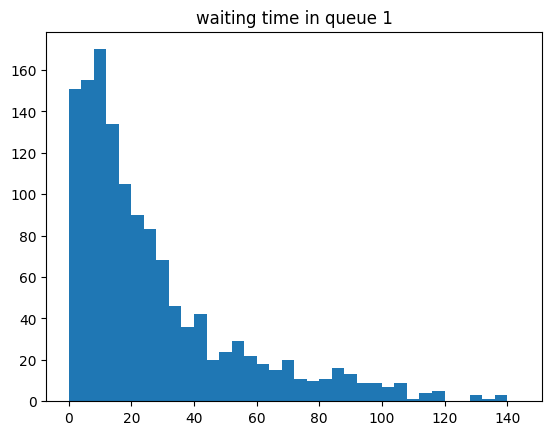

In [305]:
# waiting time in queue 1
revised_Q1_wt = np.array(Q1_wt)
revised_Q1_wt = revised_Q1_wt[revised_Q1_wt != 0]
m = round(math.sqrt(len(revised_Q1_wt)))
step = round((max(revised_Q1_wt) - min(revised_Q1_wt)) /m)
bins = [step * i for i in range(m)]
plt.title("waiting time in queue 1")
plt.hist(revised_Q1_wt, bins)
plt.show()

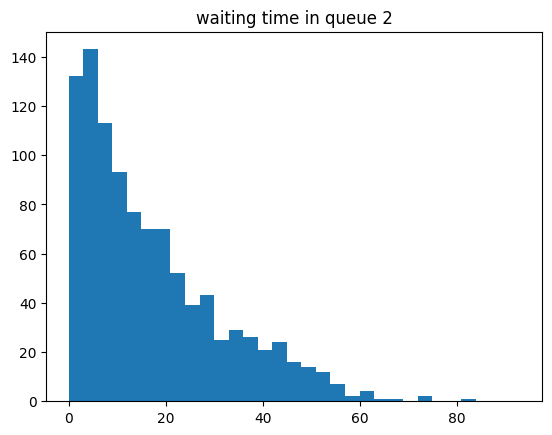

In [306]:
# waiting time in queue 2
revised_Q2_wt = np.array(Q2_wt)
revised_Q2_wt = revised_Q2_wt[revised_Q2_wt != 0]
m = round(math.sqrt(len(revised_Q2_wt)))
step = round((max(revised_Q2_wt) - min(revised_Q2_wt)) /m)
bins = [step * i for i in range(m)]
plt.title("waiting time in queue 2")
plt.hist(revised_Q2_wt, bins)
plt.show()

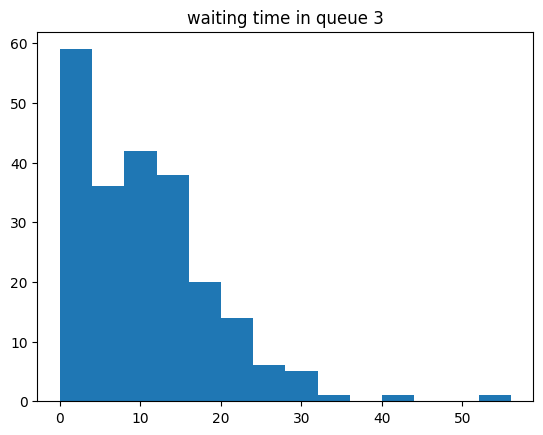

In [307]:
# waiting time in queue 3
revised_Q3_wt = np.array(Q3_wt)
revised_Q3_wt = revised_Q3_wt[revised_Q3_wt != 0]
m = round(math.sqrt(len(revised_Q3_wt)))
step = round((max(revised_Q3_wt) - min(revised_Q3_wt)) /m)
bins = [step * i for i in range(m)]
plt.title("waiting time in queue 3")
plt.hist(revised_Q3_wt, bins)
plt.show()

## results - input modeling

In [308]:
def histogram_plotter(data,bins):
    plt.figure()
    plt.hist(data , bins=bins,color='black')
    plt.xlabel('data')
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

In [309]:
def QQPLOT_exponential(data,lambda_param):
     
    
    data = np.array(sorted(data))
    
    x_axis = stats.expon.ppf((np.arange(1, len(data)+1) - 0.5) / len(data), scale=1/lambda_param)
    y_axis = data
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_axis, y_axis, color='blue', marker='o')
    plt.plot([x_axis.min(), x_axis.max()], [x_axis.min(), x_axis.max()], color='red', linestyle='--')
    plt.xlabel('Theoretical Quantiles (Exponential)')
    plt.ylabel('Sample Quantiles')
    plt.title('Q-Q Plot (Exponential Distribution)')
    plt.tight_layout()
    plt.show()

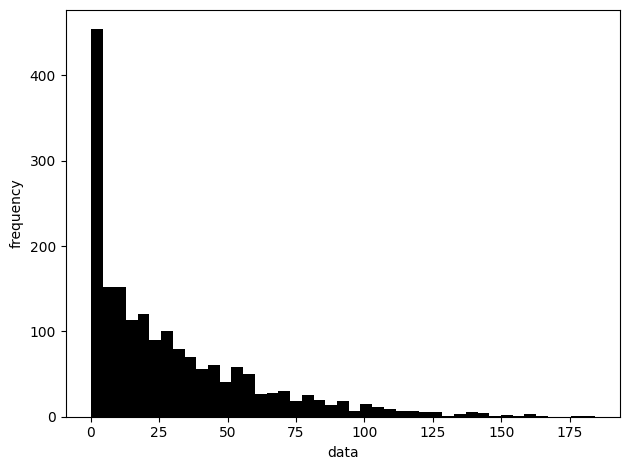

In [310]:
#Histogram p1
bins1=int(len(p1_patients_wt)**0.5)
histogram_plotter(p1_patients_wt,bins1)

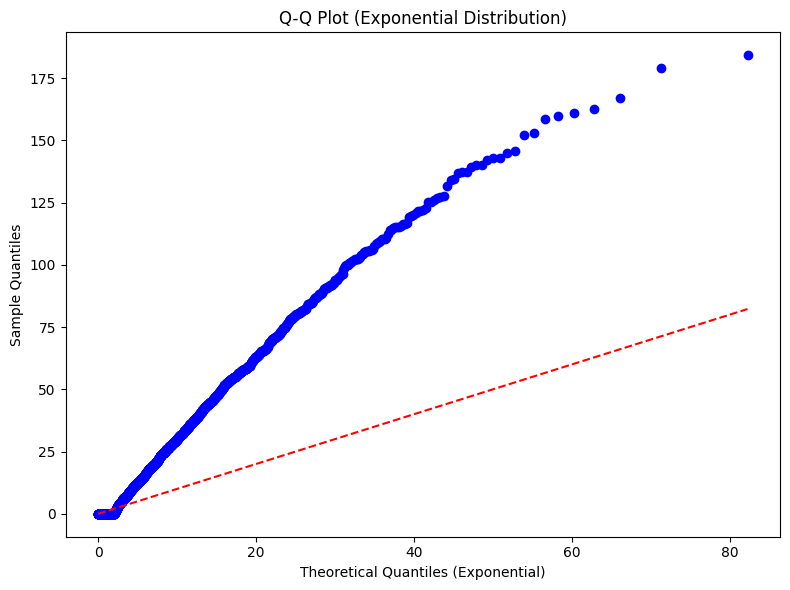

In [311]:
#QQ-plot p1 without know param
QQPLOT_exponential(p1_patients_wt,0.1)

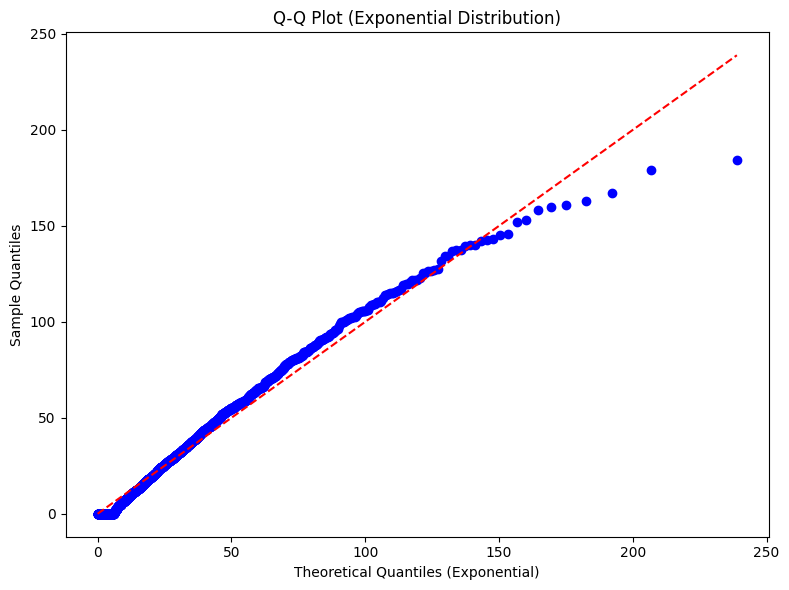

lambda param p1= 0.034434926810070515


In [312]:
#lambda param p1
lambda_param = 1 / np.mean(p1_patients_wt)
QQPLOT_exponential(p1_patients_wt,lambda_param)
print("lambda param p1=",lambda_param)

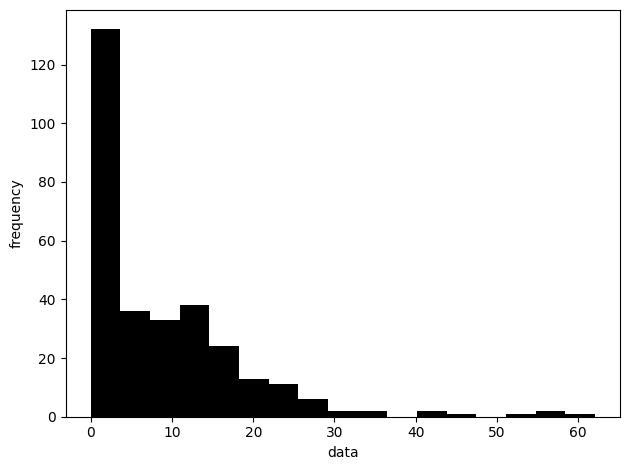

In [313]:
#Histogram p3
bins3=int(len(p3_patients_wt)**0.5)
histogram_plotter(p3_patients_wt,bins3)

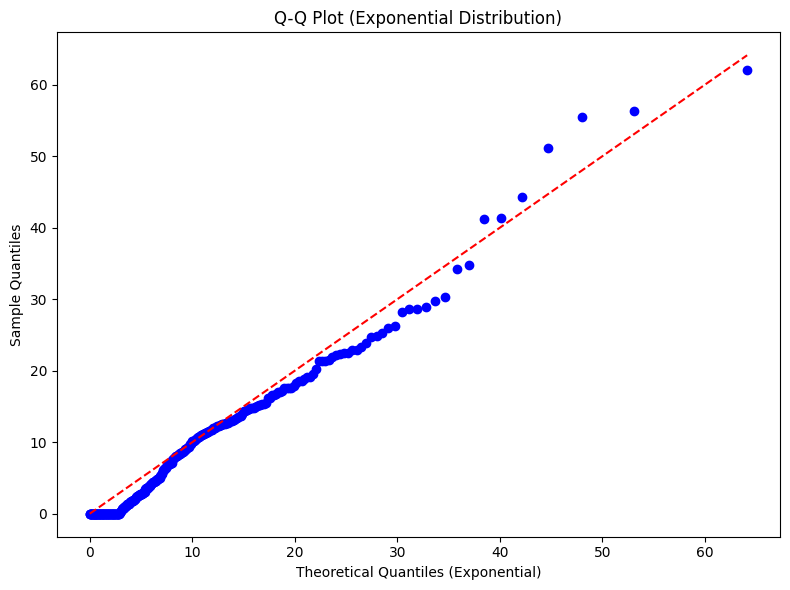

In [314]:
#QQ-plot p3 without know param
QQPLOT_exponential(p3_patients_wt,0.1)

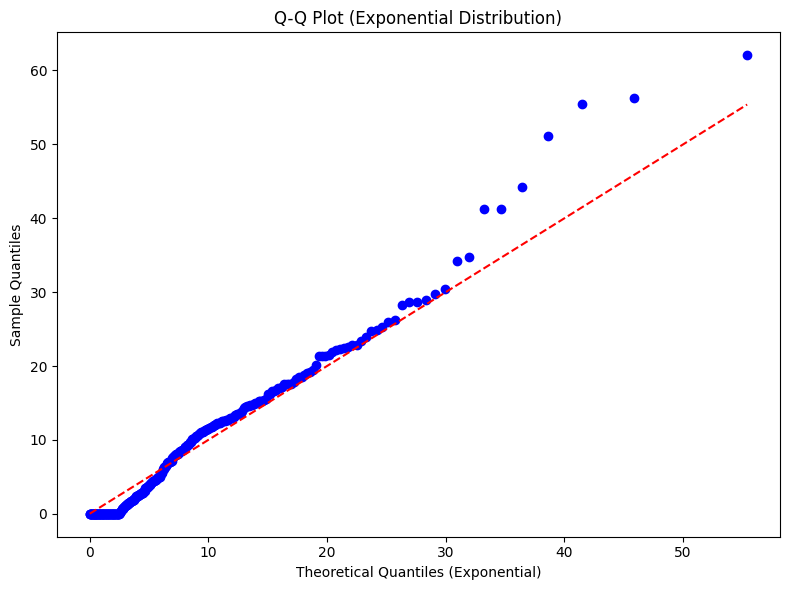

lambda param p3= 0.11572715749422502


In [315]:
#lambda param p3
lambda_param = 1 / np.mean(p3_patients_wt)
QQPLOT_exponential(p3_patients_wt,lambda_param)
print("lambda param p3=",lambda_param)

## Results for initialization

In [316]:
final_tablei = []
header = ['patient No', 'clock of arrival', 'time service 1 begins', 'service time 1', 'time service end 1','time service 2 begins', 'service time 2', 'time service end 2', 'priority', 'total waiting time', ' wt1', 'wt2']
main_patients = sorted(initialization_patients, key=lambda x: x.NO)

for patient in main_patients:
    final_tablei.append([patient.NO + 1, patient.arrival, patient.end1 - patient.service_time1, patient.service_time1, patient.end1, patient.end2 - patient.service_time2, patient.service_time2, patient.end2,patient.priority, patient.twt, patient.wt1, patient.wt2])

In [317]:
df = pd.DataFrame(final_tablei)
df.columns = header
columns_to_convert = ['clock of arrival', 'time service 1 begins','time service end 1','time service 2 begins', 'time service end 2']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_minutes_to_dd_hh_mm_ss)
df.head(50)

,patient No,clock of arrival,time service 1 begins,service time 1,time service end 1,time service 2 begins,service time 2,time service end 2,priority,total waiting time,wt1,wt2
0,1,00:00:00:00,00:00:00:00,25.646690,00:00:25:38,00:00:25:38,43.663515,00:01:09:18,3,7.105427e-15,0.000000,7.105427e-15
1,2,00:00:18:38,00:00:25:38,17.773037,00:00:43:25,00:01:09:18,9.888779,00:01:19:11,1,3.289751e+01,7.007034,2.589048e+01
2,3,00:00:36:48,00:00:43:25,12.636060,00:00:56:03,00:01:19:11,14.087242,00:01:33:17,1,2.975388e+01,6.610684,2.314320e+01
3,4,00:00:59:14,00:00:59:14,25.778453,00:01:25:01,00:01:33:17,15.583927,00:01:48:52,1,8.262420e+00,0.000000,8.262420e+00
4,5,00:01:20:55,00:01:25:01,18.811658,00:01:43:50,00:01:48:52,1.170224,00:01:50:02,1,9.130568e+00,4.095879,5.034690e+00
5,6,00:01:38:18,00:01:43:50,5.155091,00:01:48:59,00:01:50:02,14.062423,00:02:04:06,1,6.573362e+00,5.523540,1.049822e+00
6,7,00:01:59:49,00:01:59:49,26.100787,00:02:25:55,00:02:25:55,21.201290,00:02:47:07,1,0.000000e+00,0.000000,0.000000e+00
7,8,00:02:14:13,00:02:25:55,3.671755,00:02:29:36,00:02:47:07,5.915128,00:02:53:02,1,2.922929e+01,11.699750,1.752954e+01
8,9,00:02:31:24,00:02:31:24,29.397929,00:03:00:48,00:03:00:48,3.499051,00:03:04:18,1,0.000000e+00,0.000000,0.000000e+00
9,10,00:02:53:41,00:03:00:48,23.830506,00:03:24:38,00:03:24:38,0.993015,00:03:25:38,1,7.129486e+00,7.129486,0.000000e+00


In [318]:
print(f'The maximum length of Queue 1 (for low priority patients behind first doctor) is: {maxii[0]:n} and the mean is: {meani[0]:n} with standard deviation of {sigmai[0]:n}.')
print(f'The maximum length of Queue 3 (for high priority patients behind first doctor) is: {maxii[1]:n} and the mean is: {meani[1]:n} with standard deviation of {sigmai[1]:n}.')
print(f'The maximum length of Queue 2 (for all patients behind second doctor) is: {maxii[2]:n} and the mean is: {meani[2]:n} with standard deviation of {sigmai[2]:n}.')
print(f'Patients with high priority that didnt wait are: {not_waitedi[1]:n}% .\nPatients with low priority that didnt wait are: {not_waitedi[0]:n}%.')
print(f'Total percentage of patients that didnt wait is: {not_waitedi[2]:n}%')
print(f'Patients with high priority that waited less than 4 mins are: {less_4i[1]:n}% .\nPatients with low priority that that waited less than 4 mins are: {less_4i[0]:n}%.')
print(f'Total percentage of patients that that waited less than 4 mins is: {less_4i[2]:n}%')

The maximum length of Queue 1 (for low priority patients behind first doctor) is: 5 and the mean is: 0.676887 with standard deviation of 0.992565.
The maximum length of Queue 3 (for high priority patients behind first doctor) is: 5 and the mean is: 0.54717 with standard deviation of 0.913591.
The maximum length of Queue 2 (for all patients behind second doctor) is: 2 and the mean is: 0.0518868 with standard deviation of 0.232463.
Patients with high priority that didnt wait are: 40% .
Patients with low priority that didnt wait are: 35.2459%.
Total percentage of patients that didnt wait is: 35.9155%
Patients with high priority that waited less than 4 mins are: 55% .
Patients with low priority that that waited less than 4 mins are: 38.5246%.
Total percentage of patients that that waited less than 4 mins is: 40.8451%


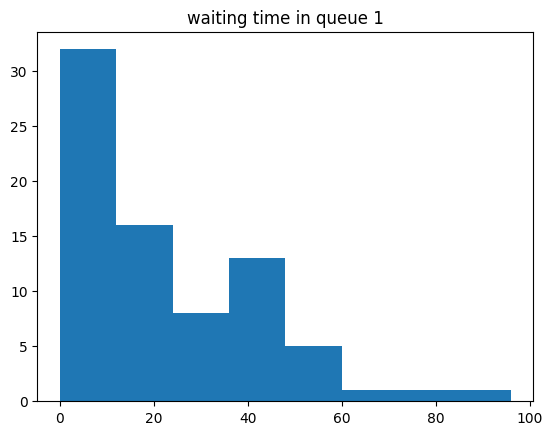

In [319]:
# waiting time in queue 1
revised_Q1i_wt = np.array(Q1i_wt)
revised_Q1i_wt = revised_Q1i_wt[revised_Q1i_wt != 0]
m = round(math.sqrt(len(revised_Q1i_wt)))
step = round((max(revised_Q1i_wt) - min(revised_Q1i_wt)) /m)
bins = [step * i for i in range(m)]
plt.title("waiting time in queue 1")
plt.hist(revised_Q1i_wt, bins)
plt.show()

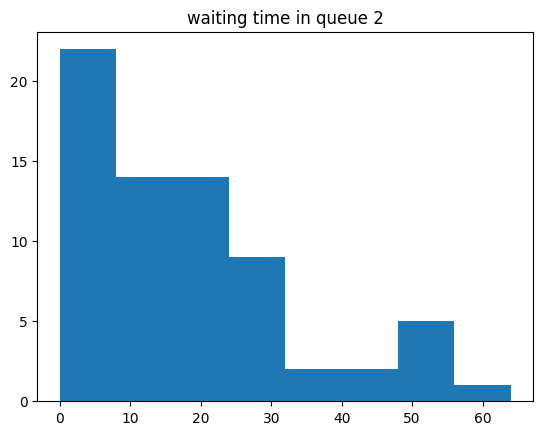

In [320]:
# waiting time in queue 2
revised_Q2i_wt = np.array(Q2i_wt)
revised_Q2i_wt = revised_Q2i_wt[revised_Q2i_wt != 0]
m = round(math.sqrt(len(revised_Q2i_wt)))
step = round((max(revised_Q2i_wt) - min(revised_Q2i_wt)) /m)
bins = [step * i for i in range(m)]
plt.title("waiting time in queue 2")
plt.hist(revised_Q2i_wt, bins)
plt.show()

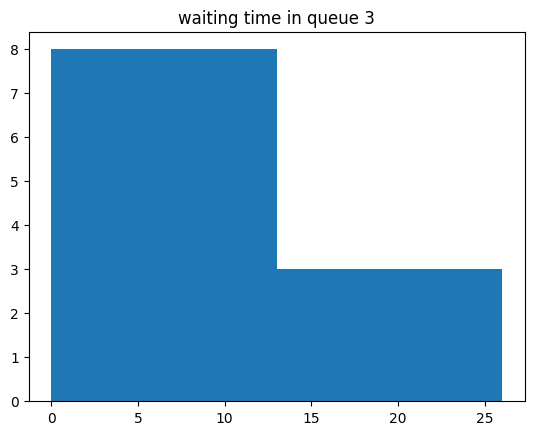

In [321]:
# waiting time in queue 3
revised_Q3i_wt = np.array(Q3i_wt)
revised_Q3i_wt = revised_Q3i_wt[revised_Q3i_wt != 0]
m = round(math.sqrt(len(revised_Q3i_wt)))
step = round((max(revised_Q3i_wt) - min(revised_Q3i_wt)) /m)
bins = [step * i for i in range(m)]
plt.title("waiting time in queue 3")
plt.hist(revised_Q3i_wt, bins)
plt.show()

## initialization results - input modeling

In [322]:
def histogram_plotter(data,bins):
    plt.figure()
    plt.hist(data , bins=bins,color='black')
    plt.xlabel('data')
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

In [323]:
def QQPLOT_exponential(data,lambda_param):
     
    
    data = np.array(sorted(data))
    
    x_axis = stats.expon.ppf((np.arange(1, len(data)+1) - 0.5) / len(data), scale=1/lambda_param)
    y_axis = data
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_axis, y_axis, color='blue', marker='o')
    plt.plot([x_axis.min(), x_axis.max()], [x_axis.min(), x_axis.max()], color='red', linestyle='--')
    plt.xlabel('Theoretical Quantiles (Exponential)')
    plt.ylabel('Sample Quantiles')
    plt.title('Q-Q Plot (Exponential Distribution)')
    plt.tight_layout()
    plt.show()

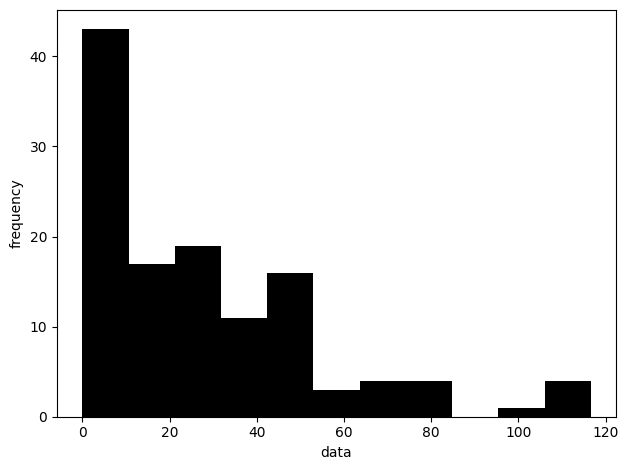

In [324]:
#Histogram p1
bins1=int(len(p1_patientsi_wt)**0.5)
histogram_plotter(p1_patientsi_wt,bins1)

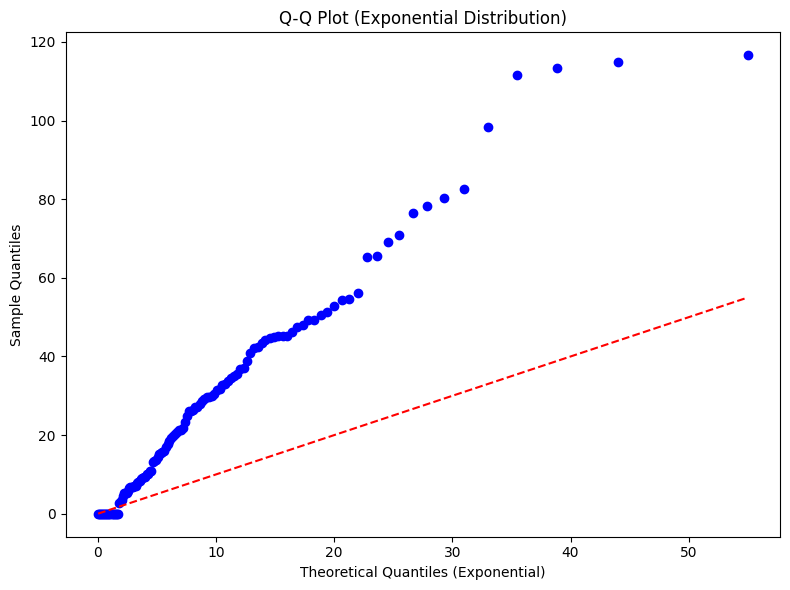

In [325]:
#QQ-plot p1 without know param
QQPLOT_exponential(p1_patientsi_wt,0.1)

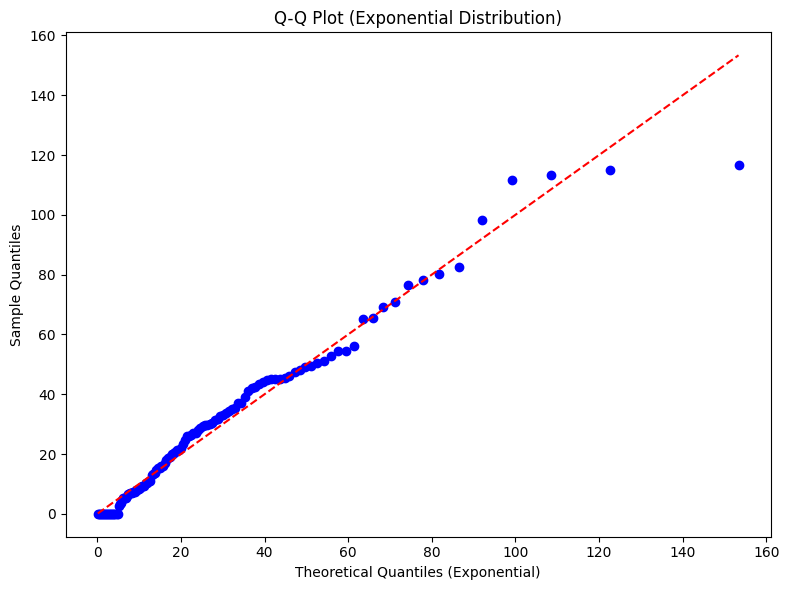

lambda param p1= 0.03584094439418253


In [326]:
#lambda param p1
lambda_param = 1 / np.mean(p1_patientsi_wt)
QQPLOT_exponential(p1_patientsi_wt,lambda_param)
print("lambda param p1=",lambda_param)

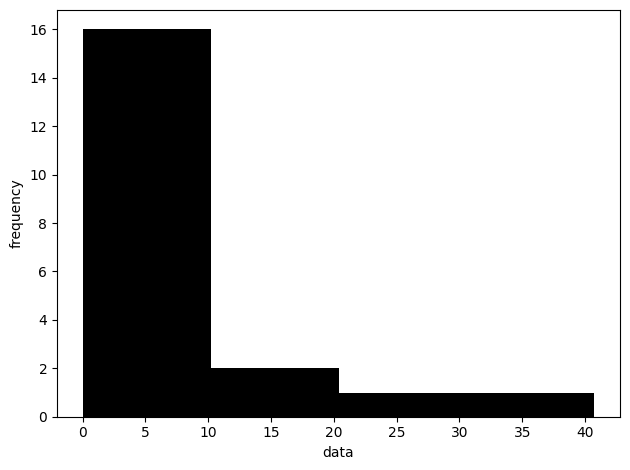

In [327]:
#Histogram p3
bins3=int(len(p3_patientsi_wt)**0.5)
histogram_plotter(p3_patientsi_wt,bins3)

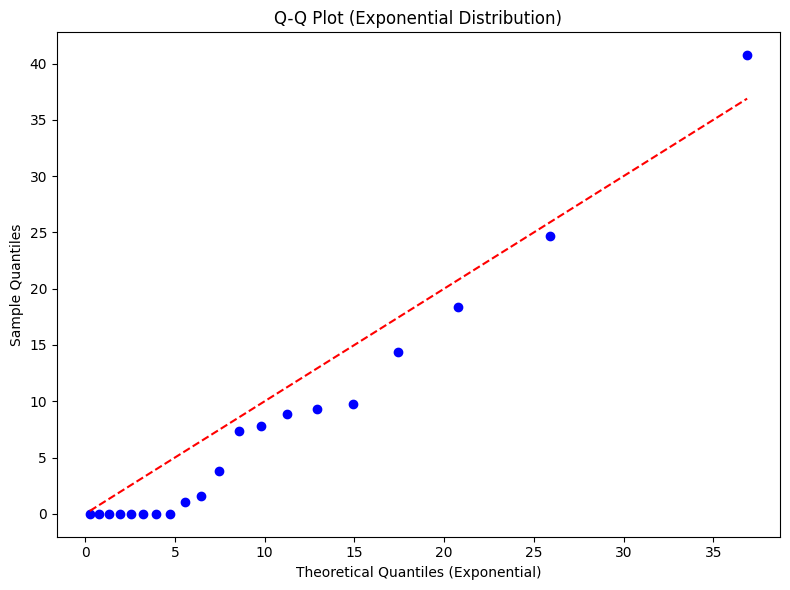

In [328]:
#QQ-plot p3 without know param
QQPLOT_exponential(p3_patientsi_wt,0.1)

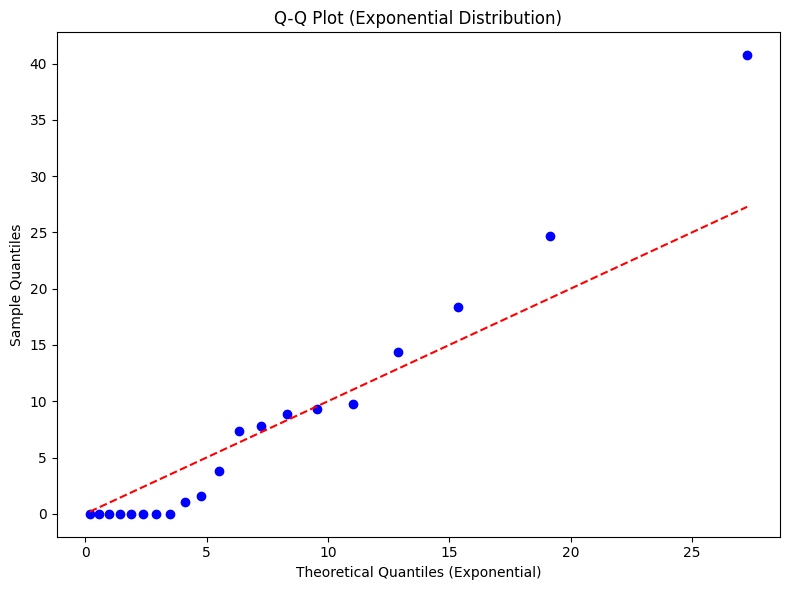

lambda param p3= 0.1352443200081266


In [329]:
#lambda param p3
lambda_param = 1 / np.mean(p3_patientsi_wt)
QQPLOT_exponential(p3_patientsi_wt,lambda_param)
print("lambda param p3=",lambda_param)